## 데이터(변수) 구간화 Binning
- 연속형 변수를 다룰 때 -> 연속형 변수 (타이타닉데이터의 age) 나이는 여러 값들로 분포되어 있다. -> 구간화를 나눠서 변수를 새롭게 만들고
- 해당 작업을 통해서 Binning을 통해서 해당 변수의 스케일이나 분포가 모델에 미치는 영향을 줄일 수 있다.
---
- 변수구간화 -> 연속형 변수를 구간 또는 범주로 나누는 것
- 연속형 변수 다양한 값들 -> 몇 개의 구간으로 나누는 것 (age 유아, 청소년, 청년, 노인 이런 식으로 )
- 모델의 복잡도 줄일 수 있다. 특정 패턴이나 추세 같은 것  파악할 때 좋다.
---
- 변수 구간화의 개념은
- 구간설정 : 연속형 변수를 나눌 구간 설정 -> 미리 개수나 도메인 지식으로 정할 수 있다.
- 구간 경계 설정 : 어디까지 어떤 값으로 하고 어디까지는 어떤 값으로 하겠다는 경계 필요
- 데이터 비닝 : 설정 구간에 따라 연속형 변수들을 구간 또는 범주에 할당
- 이산형 변수로 변환 후 사용할 수 있고, 데이터 마이닝에도 사용할 수 있다.

- 구간화의 가장 대표적인 예시
- 단순하게 구간을 정하는 경우 개수에 대한 카운팅 또는 값에 대한 경계로 하는 경우
- 값으로 동일 폭 변수 구간화
- 동일 빈도 변수 구간화

---
- 구간별 평균값으로 평활화
- 중앙값으로 평활화
- 경계값으로 평활화

In [3]:
!pip install xverse

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from xverse.transformer import WOE

In [7]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [8]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [13]:
#BMI 데이터로 예시 살펴보기
#다른 숫자형 데이터는 이산성이 두드러져서 범주화의 효과를 제대로 관찰하기 어려울 것으로 생각됨

df['BMI'].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

<ipython-input-14-24d512bab32a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'])


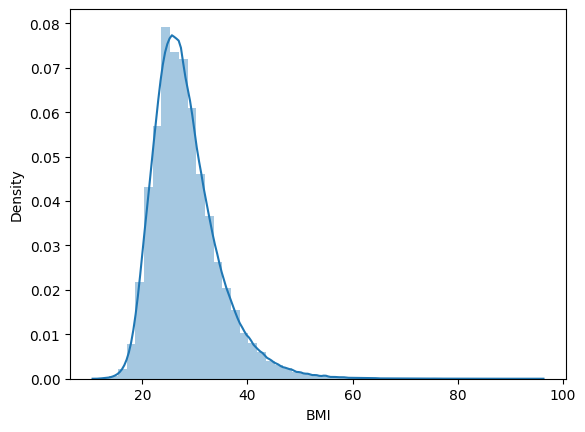

In [14]:
%matplotlib inline
sns.distplot(df['BMI'])
plt.show()

In [27]:
# 단순 구간화
# BMI 지수에 대한 도메인이 없지만 예시로 만들어 보자!

df1 =df.copy()

In [28]:
df1.insert(2, 'BMI_bin',0)
#3번째 컬럼으로 BMI_bin을 만든 뒤, 해당 값을 모두 0으로 처리

In [29]:
df1

,HeartDisease,BMI,BMI_bin,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,0,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,0,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,0,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,0,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,0,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,0,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,0,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,0,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,0,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [30]:
#도메인은 분석가가 직접 정하면 되는 것
# 예시로 학교 성적이라고 생각하면 쉽게 이해가 될 것!
df1.loc[df1['BMI'] <=20, 'BMI_bin']='a'
df1.loc[(df1['BMI'] >20) & (df1['BMI'] <=30), 'BMI_bin']='b'
df1.loc[(df1['BMI'] >30) & (df1['BMI'] <=40), 'BMI_bin']='c'
df1.loc[(df1['BMI'] >40) & (df1['BMI'] <=50), 'BMI_bin']='d'
df1.loc[(df1['BMI'] >50) & (df1['BMI'] <=60), 'BMI_bin']='e'
df1.loc[df1['BMI'] >60, 'BMI_bin']='f'
#사용자가 직접 범주화를 진행한 사례

In [31]:
#연속형인 값을
df.BMI

0         16.60
1         20.34
2         26.58
3         24.21
4         23.71
          ...  
319790    27.41
319791    29.84
319792    24.24
319793    32.81
319794    46.56
Name: BMI, Length: 319795, dtype: float64

In [32]:
#범주형으로 만들면서 진행하였다.
df1.BMI_bin.value_counts()

b    202548
c     86198
a     14699
d     13839
e      2019
f       492
Name: BMI_bin, dtype: int64

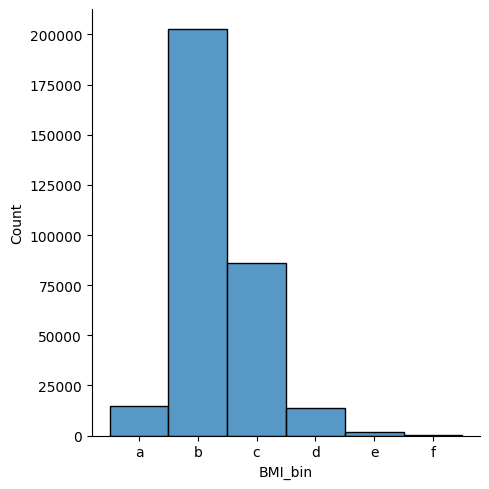

In [33]:
sns.displot(df1['BMI_bin'])

In [34]:
#pandas 에서 제공하는 cut 함수 이용해서 가능

df1.insert(3,'BMI_bin2',0)



In [35]:

df1['BMI_bin2'] = pd.cut(df1.BMI, bins=[0, 20, 30 ,40 ,50 ,60 ,70]
                         , labels = ['a','b','c','d','e','f'])
df1

,HeartDisease,BMI,BMI_bin,BMI_bin2,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,a,a,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,b,b,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,b,b,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,b,b,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,b,b,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,b,b,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,b,b,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,b,b,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,c,c,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [36]:
#실제로 구간별 집계 살펴보기

df1.BMI_bin2.value_counts().to_frame().style.background_gradient(cmap='spring')

,BMI_bin2
b,202548
c,86198
a,14699
d,13839
e,2019
f,363


- 자동으로 범위 지정 가능
- pd.qcut 함수

In [37]:
df1.insert(4,'BMI_bin3',0)

df1['BMI_bin3'] = pd.qcut(df.BMI, q=6, labels = ['a','b','c','d','e','f'])

In [38]:
df1['BMI_bin3']

0         a
1         a
2         c
3         b
4         b
         ..
319790    d
319791    d
319792    b
319793    e
319794    f
Name: BMI_bin3, Length: 319795, dtype: category
Categories (6, object): ['a' < 'b' < 'c' < 'd' < 'e' < 'f']

## Feature_selection 의 영역

- 구간화 등의 범주형 변수로 만들었을 때 이진으로 만든 경우도 있고 여러 개의 피처들을 만들었음
- 어떤 피처를 그럼 사용해야 하는가?

- WOE(Weight of Evidence) , IV(Information Value)
- 변수의 정보량과 예측력을 평가하는데 사용하는 지표
- 변수 구간화 : 연속형 분수를 여러 구간으로 나눈다 -> 범위 기반도 있고, 빈도 기반도 있고, 도메인 기반으로도 있고 여러 방법이 있다.

----
- WOE : 각 구간별로 양성, 음성 두 클래스 비율을 계산한다. -> 해당 각 클래스의 구간에 대해서 공식을 사용해서 해당 WOE 계산한다.
- ln(구간 내 양성 클래스 비율)/(구간내 음성클래스비율) 이 값의 결과로 해당 변수를 평가한다.


---
- 해당 수치가 나왔을 때 해석하는 방법?
- WOE 양수 : 구간 값들이 양성클래스의 발생이 더 관련이 있다.
- WOE 음수 : 구간 값들이 음성 클래스의 발생에 더 관련이 있다.
- WOE 값이 큰 양수 또는 큰 음수 : 해당 구간 값이 예측값과 강한 관계를 가지고 있다.
- WOE 0인 값: 클래스와 큰 관게가 없다.

- 변수선택시 유용하거나 유요하지 않거나 등의 변수를 식별하고 제외할 수 있다.

---
- IV(Information Value)변수의 예측력을 평가하는 데 사용하는 통계적 수치
- 각 구간에 대한 WOE을 위에서 계산 했을 때
- 위의 공식을 사용해서 {sum( 양성클래스 비율 ) - (음성클래스 비율)} WOE 이 값을 통해서 해당 변수의 예측력을 평가한다.

- IV 기준
- IV <0.02: 유용하지 않은 변수
- 0.02 <=IV <0.1: 약한 예측력
- 0.1 <=IV <0.3: 중간 예측력
- 0.3 <=IV <0.5: 강한 예측력
- IV >= 0.5, 1.0 이상: 매우 강한 예측력

- 어떤 변수가 타겟과 더 강한 관계를 가지고 있는지 확인하는 것
- 높은 수치라고해서 다 좋은 게 아니라 과적합의 원인이 될 수 있다. 이런 부분은 모델링을 통해서도 같이 크로스 체크 진행해야 한다.

In [39]:
import seaborn as sns
tt = sns.load_dataset('titanic')

In [41]:
tt=tt[['survived','sex','age']]
tt = tt.dropna()

tt_ss=pd.get_dummies(tt['sex']) #성별 변수를 하나 만든다! onehot
tt_ss

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [42]:
tt_age=tt[['age']]

In [43]:
y = tt[['survived']]

In [44]:
y

,survived
0,0
1,1
2,1
3,1
4,0
...,...
885,0
886,0
887,1
889,1


In [ ]:
tt_ss

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


from xverse.transformer import WOE
- 패키지를 이용해서 간단하게 예시로 볼 수 있다.

In [45]:

# WOE 모델 설정
clf = WOE()

# 예제 데이터 생성
X = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': ['A', 'B', 'A', 'B', 'A'],
    'feature3': [10, 20, 30, 40, 50],
})
print(X)
y = pd.Series([0, 1, 0, 1, 0])

# WOE 모델 학습
clf.fit(X, y)

# WOE 값 확인
woe_df = clf.woe_df
b = clf.iv_df
woe_df

   feature1 feature2  feature3
0         1        A        10
1         2        B        20
2         3        A        30
3         4        B        40
4         5        A        50


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/xverse/transformer/_woe.py:238: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.woe_df = self.woe_df.append(temp_woe, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/xverse/transformer/_woe.py:238: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,feature1,1,1,0,1,0.0,1.0,0.0,0.333333,0.0,0.0
1,feature1,2,1,1,0,1.0,0.0,0.5,0.000000,0.0,0.0
2,feature1,3,1,0,1,0.0,1.0,0.0,0.333333,0.0,0.0
3,feature1,4,1,1,0,1.0,0.0,0.5,0.000000,0.0,0.0
4,feature1,5,1,0,1,0.0,1.0,0.0,0.333333,0.0,0.0
5,feature2,A,3,0,3,0.0,1.0,0.0,1.000000,0.0,0.0
6,feature2,B,2,2,0,1.0,0.0,1.0,0.000000,0.0,0.0
7,feature3,10,1,0,1,0.0,1.0,0.0,0.333333,0.0,0.0
8,feature3,20,1,1,0,1.0,0.0,0.5,0.000000,0.0,0.0
9,feature3,30,1,0,1,0.0,1.0,0.0,0.333333,0.0,0.0


- WOE 패키지 모듈 수정한 새로운 함수

In [46]:
import numpy as np

In [47]:
class WOE:
    def __init__(self):
        self.woe_df = None
        self.iv_df = None
        self.binning_ranges = {}

    def fit(self, X, y, bins=5):
        if not isinstance(X, pd.DataFrame):
            raise ValueError("X must be a pandas DataFrame")
        if not isinstance(y, pd.Series):
            raise ValueError("y must be a pandas Series")

        data = pd.concat([X, y], axis=1)
        self.woe_df = pd.DataFrame(index=X.columns)
        self.iv_df = pd.DataFrame(columns=['IV'])

        for column in X.columns:
            # Bin 데이터 생성
            bins_data, bin_ranges = pd.cut(X[column], bins=bins, retbins=True, labels=False, precision=3, include_lowest=True)
            self.binning_ranges[column] = bin_ranges

            data_bin = pd.concat([X[column], bins_data, y], axis=1)
            data_bin.columns = [column, 'Bin', y.name]

            grouped = data_bin.groupby('Bin')[y.name].agg(['count', 'sum'])
            grouped['non_event'] = grouped['count'] - grouped['sum']
            grouped['event_rate'] = (grouped['sum'] + 0.5) / grouped['sum'].sum()
            grouped['non_event_rate'] = (grouped['non_event'] + 0.5) / grouped['non_event'].sum()
            grouped['WOE'] = np.log(grouped['event_rate'] / grouped['non_event_rate'])
            self.woe_df.loc[column, 'WOE'] = grouped['WOE'].mean()
            self.iv_df.loc[column, 'IV'] = ((grouped['event_rate'] - grouped['non_event_rate']) * grouped['WOE']).sum()

        return self.woe_df, self.iv_df

    def get_optimal_range(self, iv_threshold=0.1):
        """
        Get optimal range based on IV threshold.

        Parameters:
        - iv_threshold: float, IV threshold value

        Returns:
        - list of features with IV values above the threshold
        """
        if self.iv_df is None:
            raise ValueError("Fit the model first to compute IV values")

        return list(self.iv_df[self.iv_df['IV'] > iv_threshold].index)

    def get_binning_ranges(self):
        """
        Get binning ranges for each feature.

        Returns:
        - dictionary of binning ranges for each feature
        """
        return self.binning_ranges

# 예시 코드
#X = pd.DataFrame({
    #'Feature1': [0, 1, 2, 3, 4],
    #'Feature2': [10, 20, 30, 40, 50]
#})
#y = pd.Series([0, 1, 0, 1, 0], name='Target')

woe_model = WOE()
#woe_df, iv_df = woe_model.fit(x_fn, y_fn)
woe_df, iv_df = woe_model.fit(tt_age, y, bins=7) # x값, Y값을 넣으면 된다.
print("WOE values:")
print(woe_df)
print("\nInformation Value (IV):")
print(iv_df)

optimal_range = woe_model.get_optimal_range(iv_threshold=0.1)
print("\nFeatures with IV above the threshold:")
print(optimal_range)

binning_ranges = woe_model.get_binning_ranges()
print("\nBinning ranges:")
print(binning_ranges)

WOE values:
          WOE
age  0.164551

Information Value (IV):
           IV
age  1.168947

Features with IV above the threshold:
['age']

Binning ranges:
{'age': array([ 0.34042   , 11.78857143, 23.15714286, 34.52571429, 45.89428571,
       57.26285714, 68.63142857, 80.        ])}


In [48]:
np.max(tt_age)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


age    80.0
dtype: float64

- bin 몇 개가 적정합니까?
- 5~10, 15 적정 수준으로 보는데 데이터에 특성이나 도메인 지식에 따라서는 달라질 순 있다.
- 적정한 수는 결국 모델링도 같이 진행하면서 최적을 찾아가야 하는 것

# KBinsDiscretizer
- scikit-learn 라이브러리에서 제공하는 패키지
- 연속형 변수를 구간으로 나누어 범주형 변수로 변환하는 작업 수행
- 데이터 비닝 작업 중 하나
- bin 구간의 수에 따라 균일하게 나누거나, 지정된 구간 폭에 따라 나눌 수 있다. ( 하이퍼파라미터 값 조정할 수 있다. )

---
- encode : onehot(원핫인코딩) ordinal(레이블인코딩)
- strategy : 구간 나누는 전략, uniform - 데이터를 균일하게 나누기, quantile 데이터 분포 분위수 기반, 'kmeans' - K means 방법으로 진행


In [49]:
from sklearn.preprocessing import KBinsDiscretizer

# 예시 데이터
data = [[1, 2, 3, 4],
        [11, 12, 13, 14],
        [21, 22, 23, 24],
        [31, 32, 33, 34]]


In [54]:
est=KBinsDiscretizer(n_bins= 20, encode='ordinal', strategy ='quantile')

In [55]:
est.fit(data)

KBinsDiscretizer(encode='ordinal', n_bins=20)

In [56]:
est.transform(data)

array([[ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.],
       [13., 13., 13., 13.],
       [19., 19., 19., 19.]])

- 타이타닉데이터를 실제 패키지에 넣어보자!

In [71]:
est=KBinsDiscretizer(n_bins= 6, encode='ordinal', strategy ='quantile')

In [72]:
est.fit(tt_age)
tt_age_trn=est.transform(tt_age)

In [73]:
tt_age

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
885,39.0
886,27.0
887,19.0
889,26.0


In [74]:
import pandas as pd

In [75]:
tt_age_trn_1=pd.DataFrame(tt_age_trn)

In [76]:
tt_age_trn_1

,0
0,1.0
1,4.0
2,2.0
3,4.0
4,4.0
...,...
709,4.0
710,2.0
711,1.0
712,2.0


In [77]:
tt_age

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
885,39.0
886,27.0
887,19.0
889,26.0


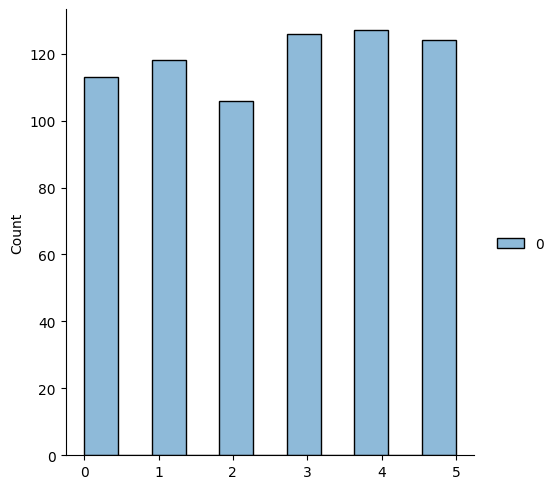

In [78]:
sns.displot(tt_age_trn_1)

In [79]:
tt_age_trn_1.value_counts()

4.0    127
3.0    126
5.0    124
1.0    118
0.0    113
2.0    106
dtype: int64